**Problem Statement**

Your company is a telecommunications provider that offers services like phone, internet, and television to residential customers. Recently, there has been an increase in customer churn, where clients are canceling their subscriptions and switching to competitors. This increase has led to a decline in revenue and customer base, prompting the need to analyze the reasons behind customer churn and find ways to improve customer retentionn.


**Objective:**
To build a churn prediction model that identifies key factors influencing customer churn. This model will help the company proactively address issues leading to churn, improving customer satisfaction and retention.

 # ***Data Understanding***

**Customer Information**
* CustomerID - Unique identifier for each customer.
* Gender - Customer gender (Male/Female).
* Partner - Indicates if the customer has a partner (Yes/No).
* SeniorCitizen - Indicates if the customer is a senior (0 = No, 1 = Yes).
* Dependents - Indicates if the customer has dependents (Yes/No).


**Account Information**
* Tenure - Number of months the customer has been with the company.
* Contract - Type of contract (Month-to-month, One year, Two year).
* PaperlessBilling - Indicates if the customer uses paperless billing (Yes/No).
* PaymentMethod - Method of payment (Electronic check, Mailed check, Bank transfer, Credit card).
* MonthlyCharges - Monthly charges for the customer.
* TotalCharges - Total charges incurred by the customer to date

**Services Availed**

* PhoneService - Indicates if the customer has phone service (Yes/No).
* MultipleLines - Indicates if the customer has multiple lines (Yes/No).
* InternetService - Type of internet service (DSL, Fiber optic, No).
* OnlineSecurity - Indicates if the customer has online security (Yes/No).
* OnlineBackup - Indicates if the customer has online backup (Yes/No).
* DeviceProtection - Indicates if the customer has device protection (Yes/No).
* TechSupport - Indicates if the customer has tech support (Yes/No).
* StreamingTV - Indicates if the customer has streaming TV service (Yes/No).
* StreamingMovies - Indicates if the customer has streaming movies service (Yes/No).

**Ticket Information**

* NumTechTickets - Number of tech support tickets raised by the customer.
* NumAdminTicket - Number of admin-related tickets raised by the customer (e.g., billing, account issues).

**Target Variable**

- Churn - Indicates if the customer has churned (Yes/No).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df=pd.read_excel("02 Churn-Dataset.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


# ***Data Exploration***

In [4]:
df.shape

(7043, 23)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

- TotalCharges has wrong data type. It will be typecasted to float.

In [8]:
df["customerID"].nunique()

7043

In [9]:
# droping the feature , which have unique values
df.drop(columns="customerID",inplace=True)

In [10]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [12]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [13]:
df["SeniorCitizen"].value_counts()


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [14]:
df["SeniorCitizen"]=df["SeniorCitizen"].map({1:"Yes",0:"No"})      # converting into object type  for analysis

In [15]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [16]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [18]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [20]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [21]:
df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [22]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [23]:
df['MultipleLines'].value_counts()    # wrong entry "no phone service"

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [24]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [25]:
df['OnlineSecurity'].value_counts()   # wrong data "no internet service"

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [26]:
df['OnlineBackup'].value_counts()     # wrong data " no internet service"

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [27]:
df['DeviceProtection'].value_counts()   # wrong data  "no internet service"

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [28]:
df['TechSupport'].value_counts()          # wrong data  "no internet service"

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [29]:
df['StreamingTV'].value_counts()          # wrong data  "no internet service"

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [30]:
df['StreamingMovies'].value_counts()      # wrong data  "no internet service"

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [31]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [32]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [33]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [34]:
df['numAdminTickets'].value_counts()

numAdminTickets
0    5842
3     262
5     245
2     243
4     228
1     223
Name: count, dtype: int64

In [35]:
df['numTechTickets'].value_counts()

numTechTickets
0    6073
1     256
2     201
3     151
4     133
5     116
6      72
7      29
8      11
9       1
Name: count, dtype: int64

In [36]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [37]:
# Convert the 'TotalCharges' column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# The errors='coerce' parameter converts any non-numeric values to NaN, allowing the conversion to float without errors.

In [38]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [39]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [40]:
def unique(df):
    for col in df.columns:
        if df[col].dtypes=="object":
            print(f"columns: {col}  {df[col].unique()}")

In [41]:
unique(df)

columns: gender  ['Female' 'Male']
columns: SeniorCitizen  ['No' 'Yes']
columns: Partner  ['Yes' 'No']
columns: Dependents  ['No' 'Yes']
columns: PhoneService  ['No' 'Yes']
columns: MultipleLines  ['No phone service' 'No' 'Yes']
columns: InternetService  ['DSL' 'Fiber optic' 'No']
columns: OnlineSecurity  ['No' 'Yes' 'No internet service']
columns: OnlineBackup  ['Yes' 'No' 'No internet service']
columns: DeviceProtection  ['No' 'Yes' 'No internet service']
columns: TechSupport  ['No' 'Yes' 'No internet service']
columns: StreamingTV  ['No' 'Yes' 'No internet service']
columns: StreamingMovies  ['No' 'Yes' 'No internet service']
columns: Contract  ['Month-to-month' 'One year' 'Two year']
columns: PaperlessBilling  ['Yes' 'No']
columns: PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
columns: Churn  ['No' 'Yes']


# ***Data Cleaning and Exploratory Data Analysis***

In [42]:
df.dropna(inplace=True)

In [43]:
df.shape[1]

22

In [44]:
continuous=["MonthlyCharges",'TotalCharges']
categorical=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']
discrete_count=['numAdminTickets','numTechTickets',"tenure"]

In [45]:
# Replace 'No internet service' with 'No' across specified columns
df[categorical] = df[categorical].replace('No internet service', 'No')

In [46]:
# Replace 'No phone service' with 'No' .
df["MultipleLines"]=df["MultipleLines"].replace('No phone service', 'No')

In [47]:
df["MultipleLines"].value_counts()

MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

In [48]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64

In [49]:
unique(df)

columns: gender  ['Female' 'Male']
columns: SeniorCitizen  ['No' 'Yes']
columns: Partner  ['Yes' 'No']
columns: Dependents  ['No' 'Yes']
columns: PhoneService  ['No' 'Yes']
columns: MultipleLines  ['No' 'Yes']
columns: InternetService  ['DSL' 'Fiber optic' 'No']
columns: OnlineSecurity  ['No' 'Yes']
columns: OnlineBackup  ['Yes' 'No']
columns: DeviceProtection  ['No' 'Yes']
columns: TechSupport  ['No' 'Yes']
columns: StreamingTV  ['No' 'Yes']
columns: StreamingMovies  ['No' 'Yes']
columns: Contract  ['Month-to-month' 'One year' 'Two year']
columns: PaperlessBilling  ['Yes' 'No']
columns: PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
columns: Churn  ['No' 'Yes']


***Analysis***

In [50]:
pd.crosstab(df["Churn"],df["gender"])

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


In [51]:
pd.crosstab(df["Churn"],df["SeniorCitizen"])

SeniorCitizen,No,Yes
Churn,,
No,4497,666
Yes,1393,476


In [52]:
pd.crosstab(df["Churn"],df["Partner"])

Partner,No,Yes
Churn,,
No,2439,2724
Yes,1200,669


In [53]:
pd.crosstab(df["Churn"],df["Dependents"])

Dependents,No,Yes
Churn,,
No,3390,1773
Yes,1543,326


In [54]:
pd.crosstab(df["Churn"],df["PhoneService"])

PhoneService,No,Yes
Churn,,
No,510,4653
Yes,170,1699


In [55]:
pd.crosstab(df["Churn"],df["MultipleLines"])

MultipleLines,No,Yes
Churn,,
No,3046,2117
Yes,1019,850


In [56]:
pd.crosstab(df["Churn"],df["InternetService"])

InternetService,DSL,Fiber optic,No
Churn,,,
No,1957,1799,1407
Yes,459,1297,113


In [57]:
pd.crosstab(df["Churn"],df["OnlineSecurity"])

OnlineSecurity,No,Yes
Churn,,
No,3443,1720
Yes,1574,295


In [58]:
pd.crosstab(df["Churn"],df["OnlineBackup"])

OnlineBackup,No,Yes
Churn,,
No,3261,1902
Yes,1346,523


In [59]:
pd.crosstab(df["Churn"],df["DeviceProtection"])

DeviceProtection,No,Yes
Churn,,
No,3290,1873
Yes,1324,545


In [60]:
pd.crosstab(df["Churn"],df["TechSupport"])

TechSupport,No,Yes
Churn,,
No,3433,1730
Yes,1559,310


In [61]:
pd.crosstab(df["Churn"],df["StreamingTV"])

StreamingTV,No,Yes
Churn,,
No,3274,1889
Yes,1055,814


In [62]:
pd.crosstab(df["Churn"],df["StreamingMovies"])

StreamingMovies,No,Yes
Churn,,
No,3250,1913
Yes,1051,818


In [63]:
pd.crosstab(df["Churn"],df["Contract"])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


In [64]:
pd.crosstab(df["Churn"],df["PaperlessBilling"])

PaperlessBilling,No,Yes
Churn,,
No,2395,2768
Yes,469,1400


In [65]:
pd.crosstab(df["Churn"],df["PaymentMethod"])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1284,1289,1294,1296
Yes,258,232,1071,308


In [66]:
pd.crosstab(df["Churn"],df["numAdminTickets"])

numAdminTickets,0,1,2,3,4,5
Churn,,,,,,
No,4253,175,181,195,181,178
Yes,1581,47,62,67,47,65


In [67]:
pd.crosstab(df["Churn"],df["numTechTickets"])

numTechTickets,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
No,4866,88,75,50,41,29,13,1,0,0
Yes,1196,168,126,101,92,87,59,28,11,1


In [68]:
pd.crosstab(df["Churn"],df["tenure"])

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Yes,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6


In [69]:
pd.crosstab(df["TechSupport"],df["numAdminTickets"])

numAdminTickets,0,1,2,3,4,5
TechSupport,,,,,,
No,4158,158,170,187,144,175
Yes,1676,64,73,75,84,68


In [70]:
pd.crosstab(df["TechSupport"],df["numTechTickets"])

numTechTickets,0,1,2,3,4,5,6,7,8,9
TechSupport,,,,,,,,,,
No,4316,194,151,105,85,74,43,17,6,1
Yes,1746,62,50,46,48,42,29,12,5,0


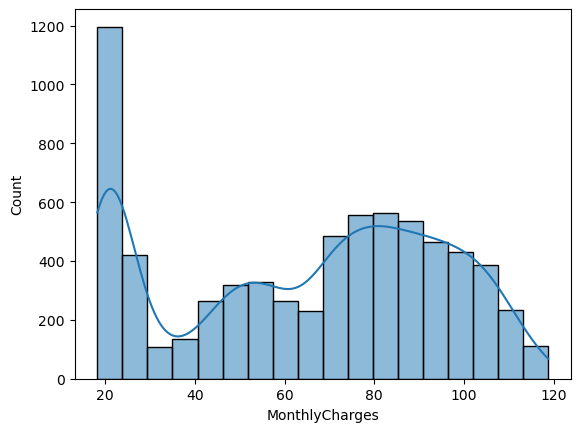

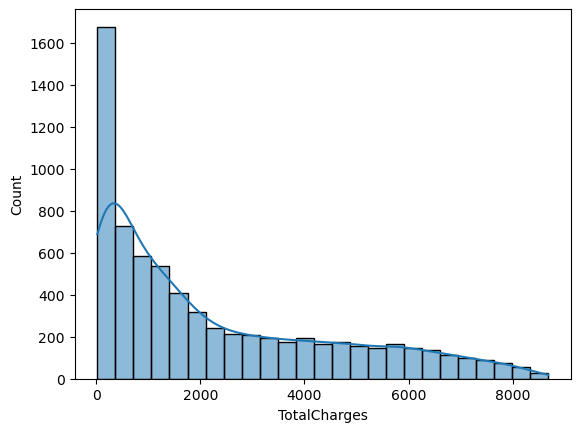

In [71]:
for col in continuous:
    sns.histplot(df[col],kde=True)
    plt.show()

In [72]:
df[continuous].skew()

MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

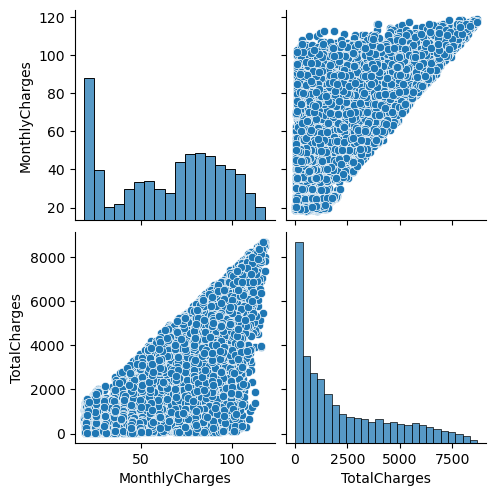

In [73]:
sns.pairplot(df[continuous])

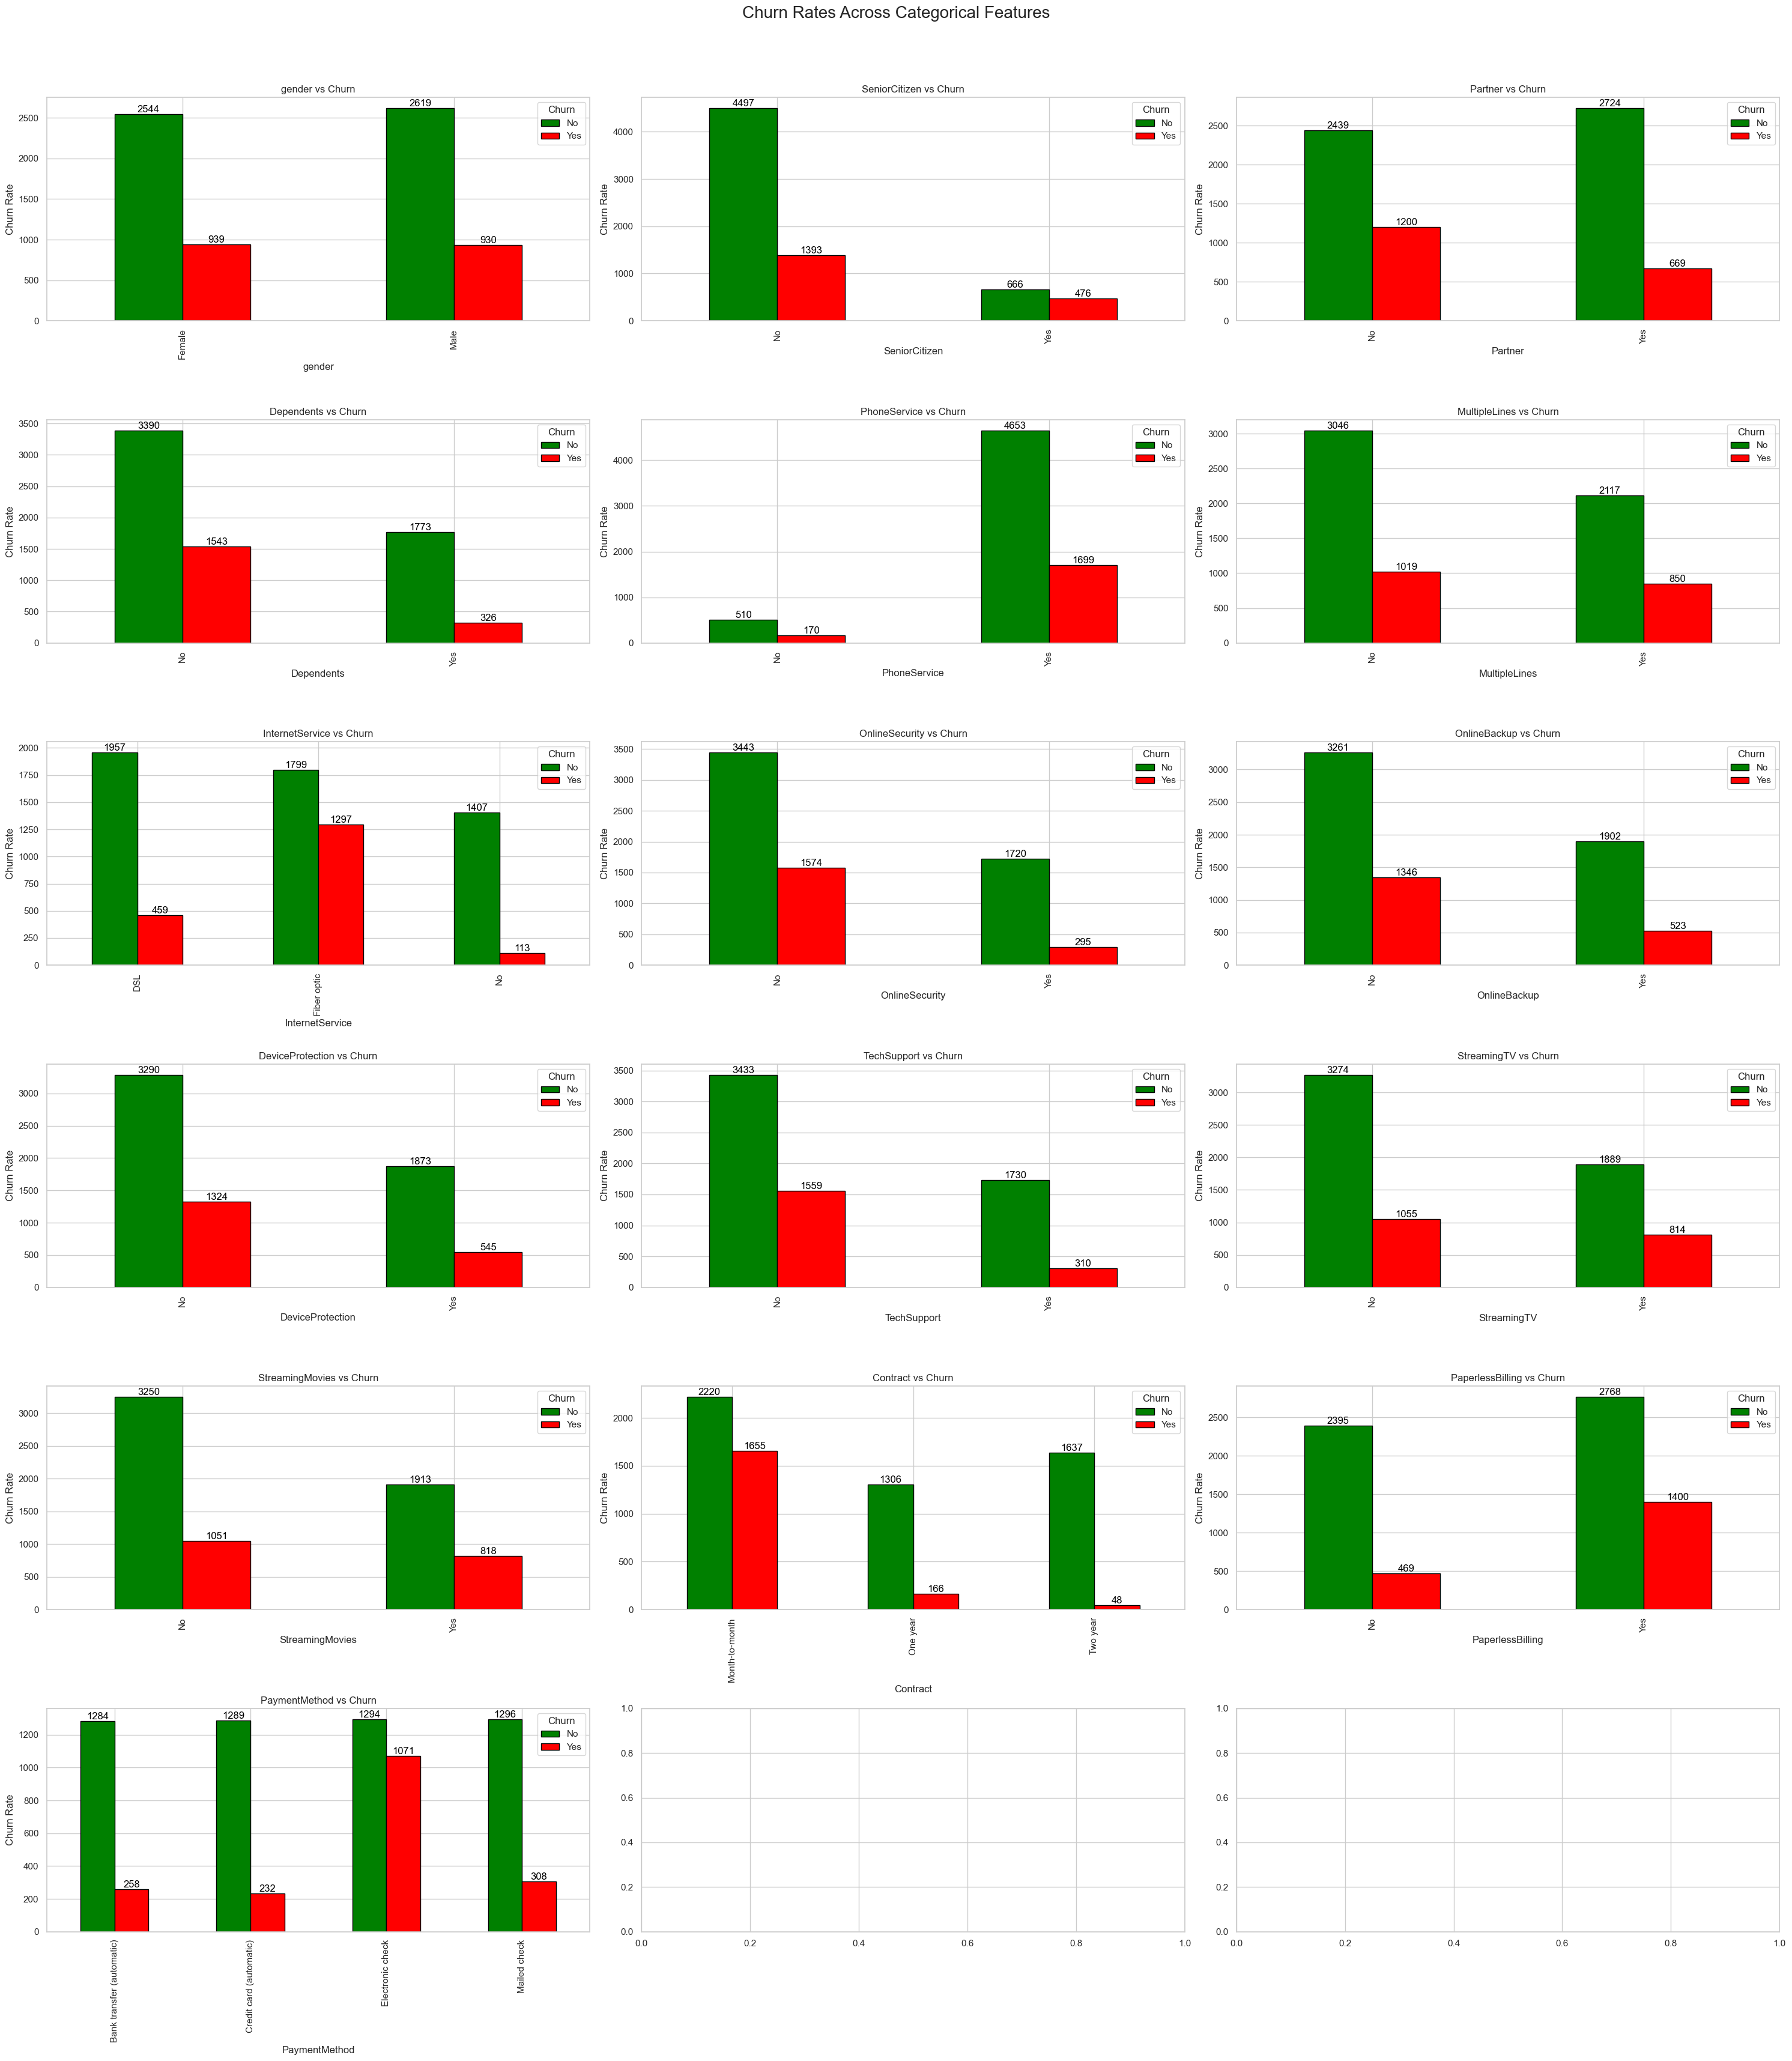

In [74]:
# Set up the visual style
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30, 35))
fig.suptitle('Churn Rates Across Categorical Features', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot churn rate for each categorical variable
for i, col in enumerate(categorical[:-1]):  # Exclude 'Churn' as it's the target
    # Calculate churn rates for each category
    churn_data = df.groupby(col)['Churn'].value_counts().unstack().fillna(0)
    
    # Plot with distinct colors for "Yes" and "No"
    churn_data.plot(kind="bar", ax=axes[i], color=['green', 'red'], edgecolor='black')
    # Annotate bars
    for p in axes[i].patches:
        if p.get_height() > 0:
            axes[i].annotate(int(p.get_height()),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', fontsize=12, color='black')
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_ylabel('Churn Rate')
    axes[i].set_xlabel(col)
    axes[i].legend(['No', 'Yes'], title='Churn')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [75]:
from scipy.stats import chi2_contingency,f_oneway
chi2_results = {}
for col in categorical[:-1]:  # excluding the target variable 'Churn'
    # Create the contingency table for chi-squared test
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = round(p_value,5)

# Filter out features with high p-value (less significant features)
significant_categorical = {k: v for k, v in chi2_results.items() if v <= 0.05}
non_significant={r: p for r, p in chi2_results.items() if p > 0.05} 
print("\nSignificant Categorical Features based on Chi-squared test:")
print(significant_categorical)

print("\nNon-Significant Categorical Features based on Chi-squared test:")
print(non_significant)



Significant Categorical Features based on Chi-squared test:
{'SeniorCitizen': 0.0, 'Partner': 0.0, 'Dependents': 0.0, 'MultipleLines': 0.00087, 'InternetService': 0.0, 'OnlineSecurity': 0.0, 'OnlineBackup': 0.0, 'DeviceProtection': 0.0, 'TechSupport': 0.0, 'StreamingTV': 0.0, 'StreamingMovies': 0.0, 'Contract': 0.0, 'PaperlessBilling': 0.0, 'PaymentMethod': 0.0}

Non-Significant Categorical Features based on Chi-squared test:
{'gender': 0.49049, 'PhoneService': 0.34992}


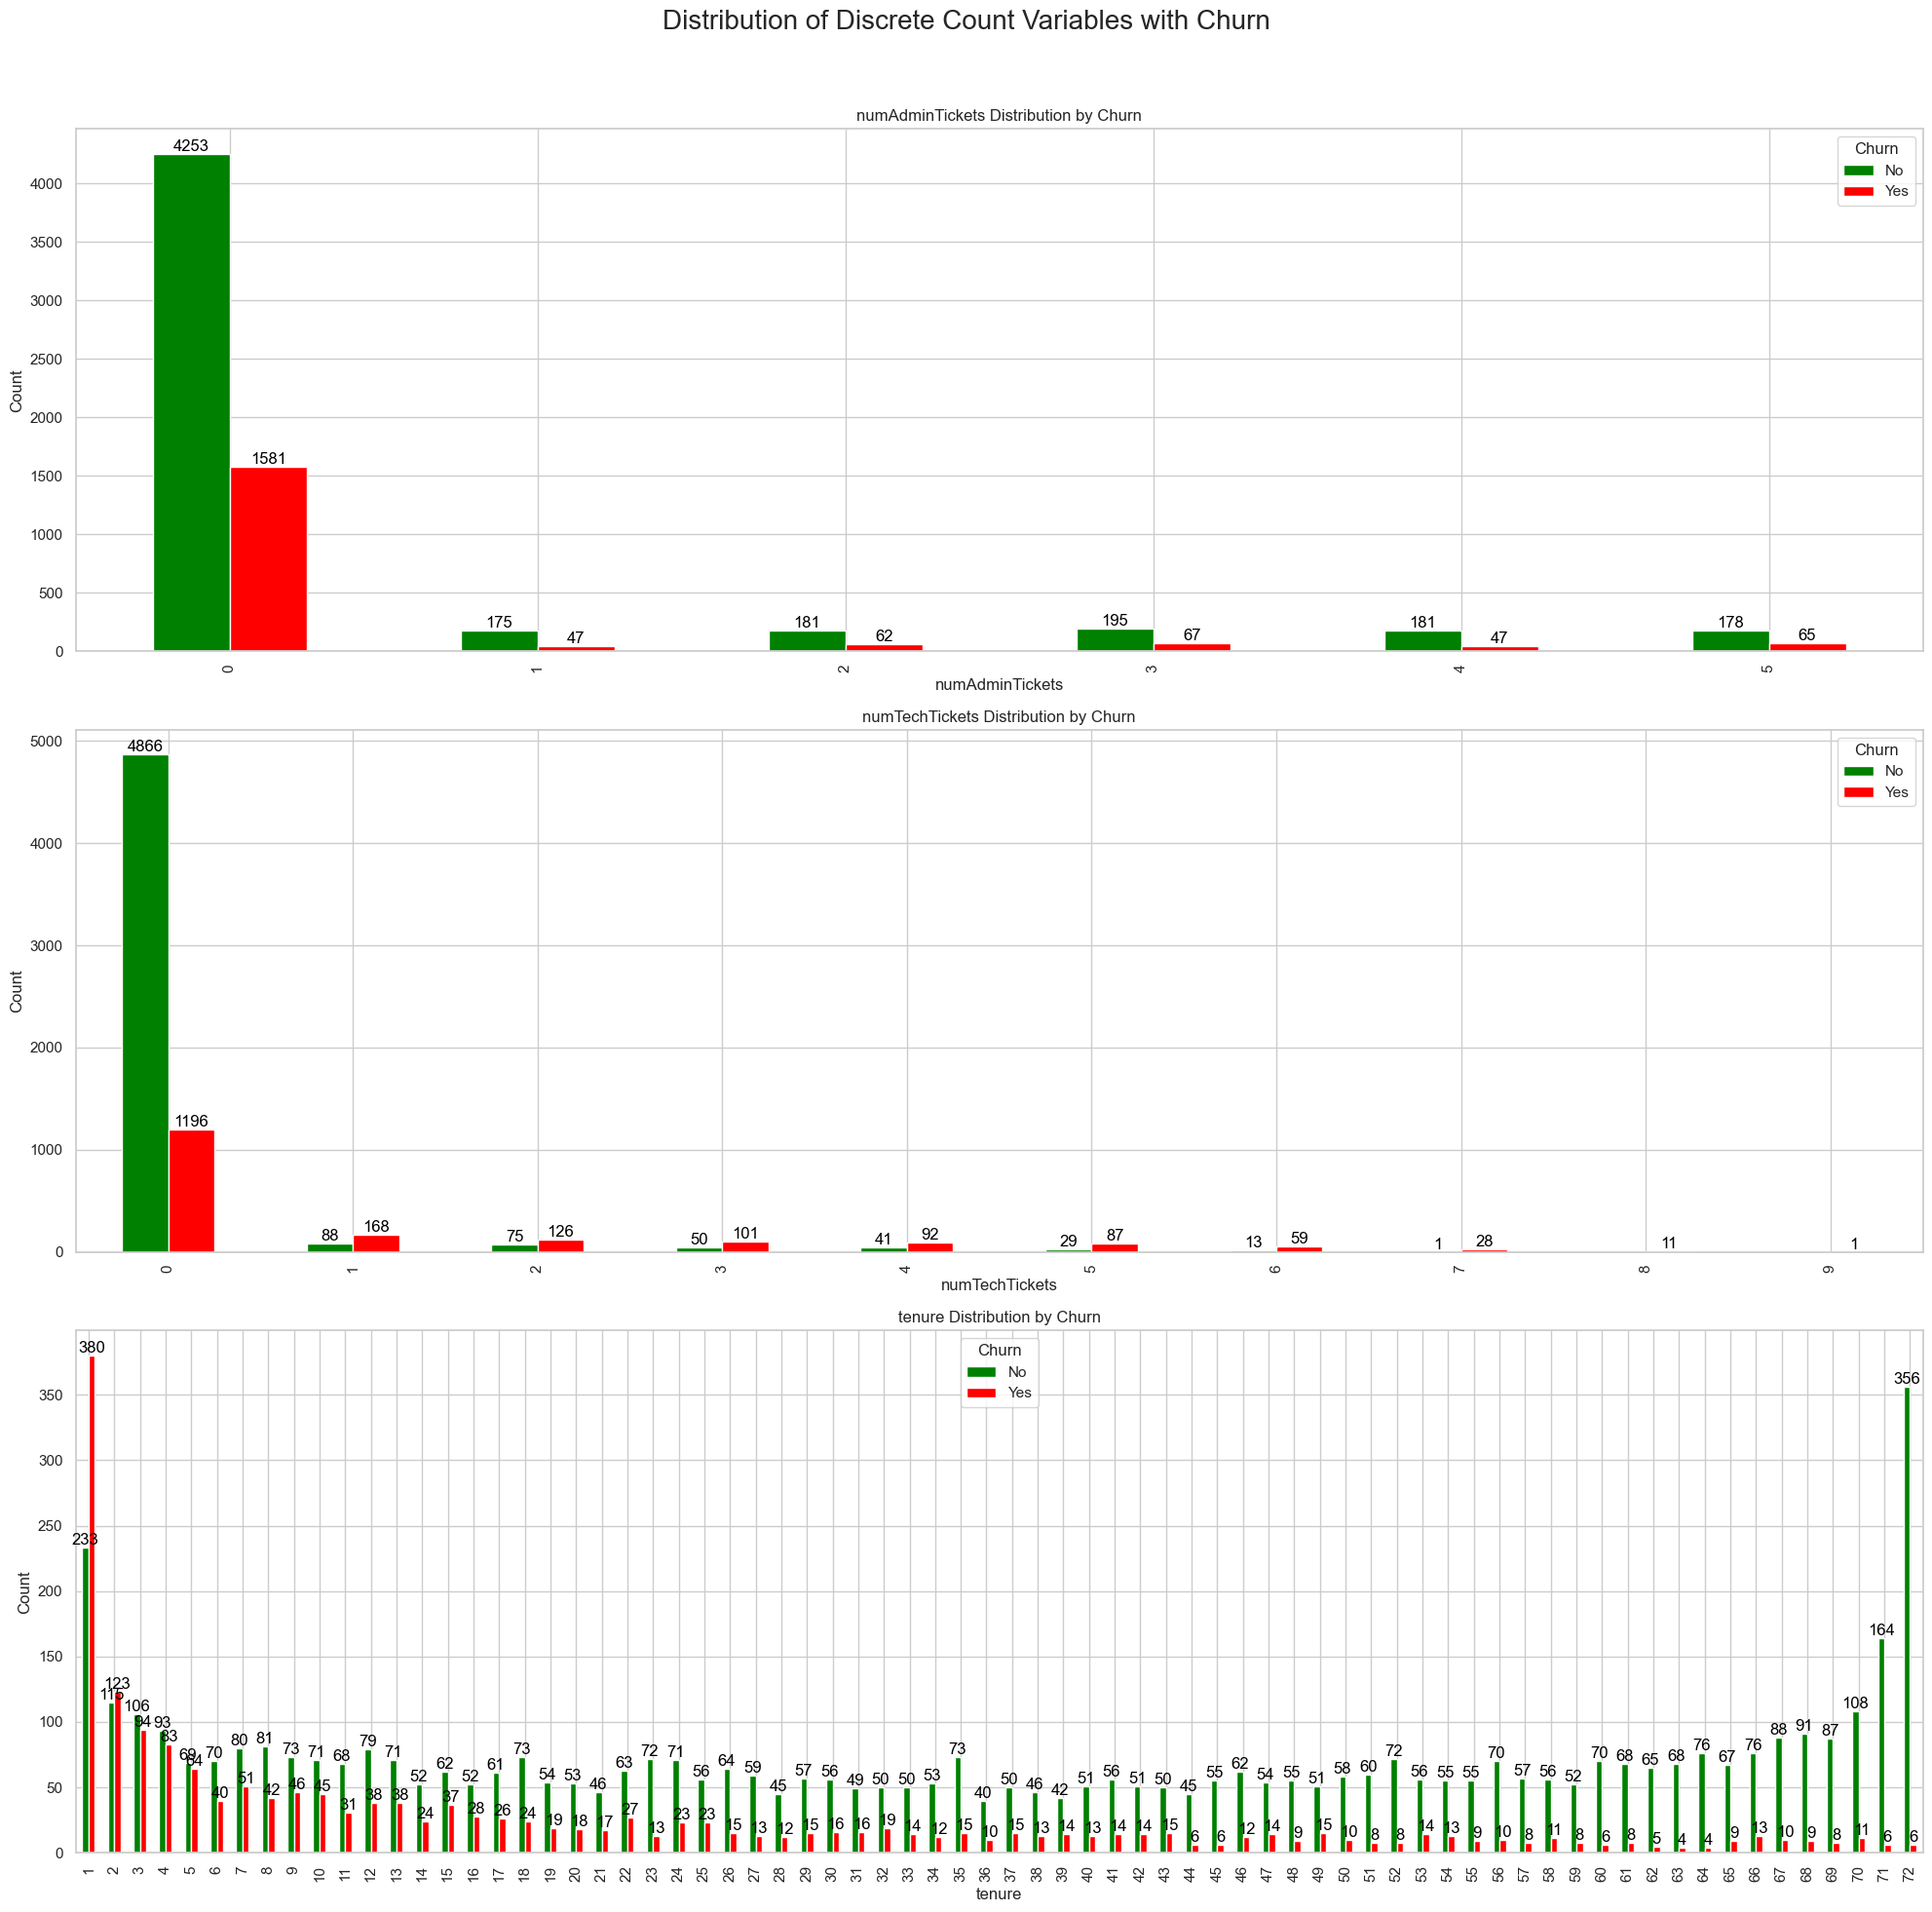

In [76]:
# Set up the visual style
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(discrete_count), ncols=1, figsize=(20, 20))
fig.suptitle('Distribution of Discrete Count Variables with Churn', fontsize=20)

# Plot for each discrete count variable
for i, col in enumerate(discrete_count):
    # Group data by discrete count variable and churn
    churn_data = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    
    # Plot on the respective axis
    churn_data.plot(kind='bar', stacked=False, ax=axes[i], color=['green','red'])
    
    # Annotate bars
    for p in axes[i].patches:
        if p.get_height() > 0:
            axes[i].annotate(int(p.get_height()),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', fontsize=12, color='black')
    
    # Set axis titles
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


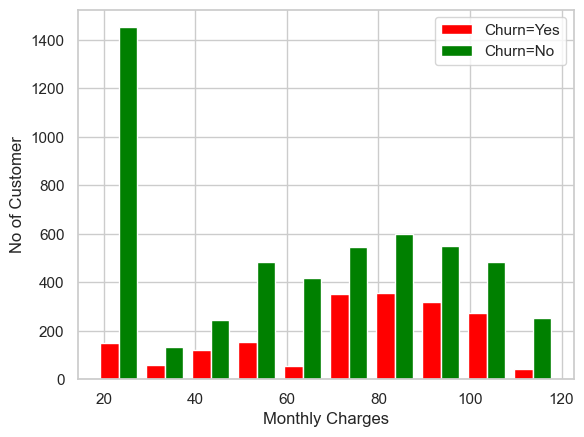

In [77]:
mc_churn_yes=df[df["Churn"]=="Yes"].MonthlyCharges
mc_churn_no=df[df["Churn"]=="No"].MonthlyCharges
plt.hist([mc_churn_yes,mc_churn_no],color=["red","green"],label=["Churn=Yes","Churn=No"])
plt.xlabel("Monthly Charges")
plt.ylabel("No of Customer")
plt.legend()
plt.show()

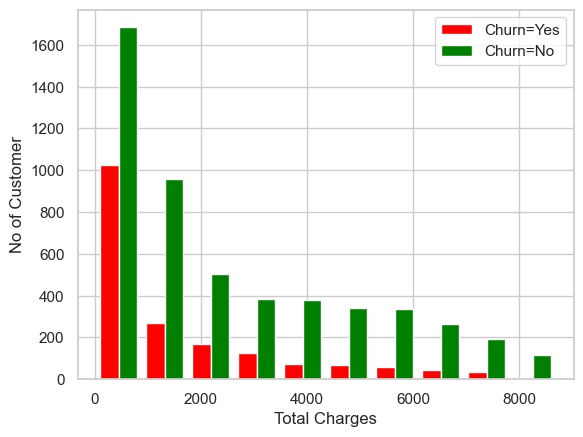

In [78]:
tc_churn_yes=df[df["Churn"]=="Yes"].TotalCharges
tc_churn_no=df[df["Churn"]=="No"].TotalCharges
plt.hist([tc_churn_yes,tc_churn_no],color=["red","green"],label=["Churn=Yes","Churn=No"])
plt.xlabel("Total Charges")
plt.ylabel("No of Customer")
plt.legend()
plt.show()

In [79]:
# Perform ANOVA for Continuous and Discrete Count Features
anova_results = {}
for col in continuous + discrete_count:
    # Split the data into two groups: Churn (1) and No Churn (0)
    churn_0 = df[df['Churn'] == "No"][col]
    churn_1 = df[df['Churn'] == "Yes"][col]
    
    # Perform the ANOVA test (F-test)
    f_stat, p_value = f_oneway(churn_0, churn_1)
    anova_results[col] = round(p_value,5)

# Filter out features with high p-value (less significant features)
significant_continuous_discrete = {k: v for k, v in anova_results.items() if v < 0.05}
non_significant_cont={r: p for r, p in anova_results.items() if p > 0.05} 

print("\nSignificant Continuous and Discrete Features based on ANOVA F-test:")
print(significant_continuous_discrete)

print("\nNon-Significant Continuous and Discrete Features based on ANOVA F-test:")
print(non_significant_cont)


Significant Continuous and Discrete Features based on ANOVA F-test:
{'MonthlyCharges': 0.0, 'TotalCharges': 0.0, 'numTechTickets': 0.0, 'tenure': 0.0}

Non-Significant Continuous and Discrete Features based on ANOVA F-test:
{'numAdminTickets': 0.10095}


# **Data Preprocessing**

In [80]:
# feature elimination using statistical method
df.drop(columns=["gender","PhoneService","numAdminTickets"],inplace=True)

In [81]:
continuous=["MonthlyCharges",'TotalCharges']
categorical=['SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
             'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']
discrete_count=['numTechTickets',"tenure"]

In [82]:
df["SeniorCitizen"]=df["SeniorCitizen"].map({"Yes":1,"No":0})
df["Partner"]=df["Partner"].map({"Yes":1,"No":0})
df['Dependents']=df['Dependents'].map({"Yes":1,"No":0})
df['MultipleLines']=df['MultipleLines'].map({"Yes":1,"No":0})
df['OnlineSecurity']=df['OnlineSecurity'].map({"Yes":1,"No":0})
df['OnlineBackup']=df['OnlineBackup'].map({"Yes":1,"No":0})
df['DeviceProtection']=df['TechSupport'].map({"Yes":1,"No":0})
df['StreamingTV']=df['StreamingTV'].map({"Yes":1,"No":0})
df['StreamingMovies']=df['StreamingMovies'].map({"Yes":1,"No":0})
df['Churn']=df['Churn'].map({"Yes":1,"No":0})
df['PaperlessBilling']=df['PaperlessBilling'].map({"Yes":1,"No":0})
df['TechSupport']=df['TechSupport'].map({"Yes":1,"No":0})

In [83]:
df["tenure"]=df["tenure"]/12

In [84]:
df["tenure"]

0       0.083333
1       2.833333
2       0.166667
3       3.750000
4       0.166667
          ...   
7038    2.000000
7039    6.000000
7040    0.916667
7041    0.333333
7042    5.500000
Name: tenure, Length: 7032, dtype: float64

In [85]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df["MonthlyCharges"]=min_max.fit_transform(df[["MonthlyCharges"]])
df["TotalCharges"]=min_max.fit_transform(df[["TotalCharges"]])

In [86]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numTechTickets,Churn
0,0,1,0,0.083333,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0,0
1,0,0,0,2.833333,0,DSL,1,0,0,0,0,0,One year,0,Mailed check,0.385075,0.215867,0,0
2,0,0,0,0.166667,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,0,1
3,0,0,0,3.750000,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,3,0
4,0,0,0,0.166667,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,0,1


In [87]:
#pd.set_option("display.max_columns",None)

In [88]:
dummy=["InternetService","Contract","PaymentMethod"]

In [89]:
df1=pd.get_dummies(df,dtype=int,drop_first=True)  

In [90]:
df1

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,numTechTickets,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.083333,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,0,0,1,0
1,0,0,0,2.833333,0,1,0,0,0,0,0,0,0.385075,0.215867,0,0,0,0,1,0,0,0,1
2,0,0,0,0.166667,0,1,1,0,0,0,0,1,0.354229,0.010310,0,1,0,0,0,0,0,0,1
3,0,0,0,3.750000,0,1,0,1,1,0,0,0,0.239303,0.210241,3,0,0,0,1,0,0,0,0
4,0,0,0,0.166667,0,0,0,0,0,0,0,1,0.521891,0.015330,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,2.000000,1,1,0,1,1,1,1,1,0.662189,0.227521,0,0,0,0,1,0,0,0,1
7039,0,1,1,6.000000,1,0,1,0,0,1,1,1,0.845274,0.847461,5,0,1,0,1,0,1,0,0
7040,0,1,1,0.916667,0,1,0,0,0,0,0,1,0.112935,0.037809,0,0,0,0,0,0,0,1,0
7041,1,1,0,0.333333,1,0,0,0,0,0,0,1,0.558706,0.033210,0,1,1,0,0,0,0,0,1


In [91]:
df1.to_csv("Cleaned_processed.csv",index=False)